# Perihelion Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We read the text file containing the first and last orbit of Mercury of the 100 year simulation. We then find the points closest to the sun in each orbit and plot them together on the orbits. We also print the angle between them in arcseconds.

Perihelion angle change = -0.4330207330054679''


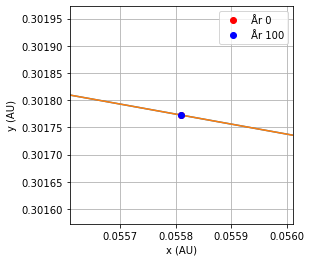

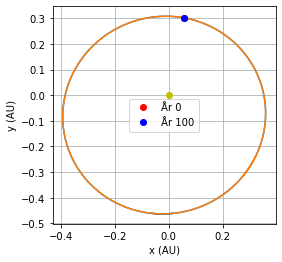

Perihelion angle change = -55.73202111479368''


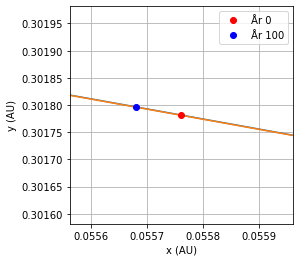

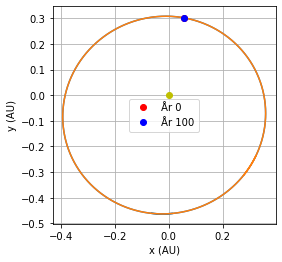

In [2]:
for filename in ["Output/mercuryNormal.txt", "Output/mercury.txt"]:
    nameMass = np.array(pd.read_csv(filename, header=None, delim_whitespace=True, nrows=1))[0]

    df = pd.read_csv(filename, header=None, delim_whitespace=True, skiprows = 1)

    n_planets = len(nameMass) // 2
    names = [nameMass[2*i] for i in range(n_planets)]
    masses = [nameMass[2*i + 1] for i in range(n_planets)]
    
    inds = len(df) // 2
    startOrbit = np.array([df[0][:inds], df[1][:inds]])
    endOrbit = np.array([df[0][-inds:], df[1][-inds:]])

    shortest = 1000
    peri = [1, 1]
    for i in range(inds):
        dist2 = startOrbit[0][i]**2 + startOrbit[1][i]**2
        if dist2 < shortest:
            shortest = dist2
            peri = [startOrbit[0][i], startOrbit[1][i]]

    shortest2 = 1000
    peri2 = [1, 1]
    for i in range(inds):
        dist2 = endOrbit[0][i]**2 + endOrbit[1][i]**2
        if dist2 < shortest2:
            shortest2 = dist2
            peri2 = [endOrbit[0][i], endOrbit[1][i]]

    pAngStart = np.arctan(peri[1]/peri[0])
    pAngEnd = np.arctan(peri2[1]/peri2[0])

    pAngDiff = pAngStart - pAngEnd
    print(f"Perihelion angle change = {pAngDiff * 206264.806}''")

    plt.figure(figsize = (4, 4))
    plt.plot(startOrbit[0], startOrbit[1])
    plt.plot(endOrbit[0], endOrbit[1])
    plt.plot(peri[0], peri[1], "ro", label = "År 0")
    plt.plot(peri2[0], peri2[1], "bo", label = "År 100")
    plt.plot([0], [0], "yo")
    plt.legend()
    plt.xlim(peri[0] - 0.0002, peri[0] + 0.0002)
    plt.ylim(peri[1] - 0.0002, peri[1] + 0.0002)
    plt.grid()
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    plt.show()

    plt.figure(figsize = (4, 4))
    plt.plot(startOrbit[0], startOrbit[1])
    plt.plot(endOrbit[0], endOrbit[1])
    plt.plot(peri[0], peri[1], "ro", label = "År 0")
    plt.plot(peri2[0], peri2[1], "bo", label = "År 100")
    plt.plot([0], [0], "yo")
    plt.legend()
    plt.grid()
    plt.xlabel("x (AU)")
    plt.ylabel("y (AU)")
    plt.show()